# Logistic Regression

In [3]:
import pandas as pd

### 1. Read in the Penguin Data

In [4]:
df = pd.read_csv('../data/penguins_simple.csv', sep=';')
df.head(3)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE


### 2. Exploratory Analysis with groupby

To use groupby:

1. category(s) to group by
2. select column(s)
3. aggregation function

In [10]:
# mean body mass by species
df.groupby('Species')['Body Mass (g)'].mean()

Species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: Body Mass (g), dtype: float64

In [11]:
# only female penguins
female = df[df.Sex == 'FEMALE']
female.groupby('Species')['Body Mass (g)'].mean()

Species
Adelie       3368.835616
Chinstrap    3527.205882
Gentoo       4679.741379
Name: Body Mass (g), dtype: float64

In [12]:
# number of 
df.groupby('Species')['Body Mass (g)'].count()

Species
Adelie       146
Chinstrap     68
Gentoo       119
Name: Body Mass (g), dtype: int64

In [13]:
# agregation
df.groupby('Species')['Body Mass (g)'].sum()

Species
Adelie       541100.0
Chinstrap    253850.0
Gentoo       606000.0
Name: Body Mass (g), dtype: float64

In [14]:
# agregations : mean, median, min, max, coun, std, sum, describe
df.groupby('Species')['Body Mass (g)'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Adelie,146.0,3706.164384,458.620135,2850.0,3362.5,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,119.0,5092.436975,501.476154,3950.0,4700.0,5050.0,5500.0,6300.0


In [17]:
# select 1+ column
df.groupby('Species')[['Body Mass (g)', 'Culmen Length (mm)']].mean()

,Body Mass (g),Culmen Length (mm)
Species,,
Adelie,3706.164384,38.823973
Chinstrap,3733.088235,48.833824
Gentoo,5092.436975,47.568067


In [19]:
# group by 1+ categories
df.groupby(['Species', 'Sex'])['Body Mass (g)'].mean()

Species    Sex   
Adelie     FEMALE    3368.835616
           MALE      4043.493151
Chinstrap  FEMALE    3527.205882
           MALE      3938.970588
Gentoo     FEMALE    4679.741379
           MALE      5484.836066
Name: Body Mass (g), dtype: float64

In [22]:
# unstack => wide format 
df.groupby(['Species', 'Sex'])['Body Mass (g)'].mean().unstack()

Sex,FEMALE,MALE
Species,,
Adelie,3368.835616,4043.493151
Chinstrap,3527.205882,3938.970588
Gentoo,4679.741379,5484.836066


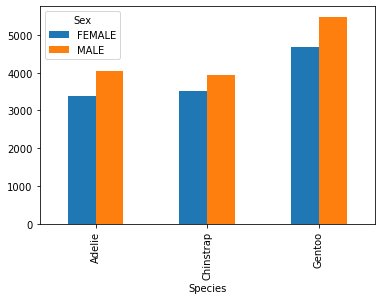

In [23]:
df.groupby(['Species', 'Sex'])['Body Mass (g)'].mean().unstack().plot.bar()

In [25]:
mm = df.groupby(['Species', 'Sex'])['Body Mass (g)'].mean().unstack()
mm.iloc[1,0]

3527.205882352941

### 3. Define X and y 

In [26]:
# only two Species
df2 = df[df.Species != 'Chinstrap']

In [27]:
X = df2[['Body Mass (g)', 'Culmen Length (mm)']]
y = df2['Species']

In [28]:
# shape check! (M,N), (M,) 
# M has to be the same and y is a vector
X.shape, y.shape

((265, 2), (265,))

In [49]:
X.head()

,Body Mass (g),Culmen Length (mm)
0,3750.0,39.1
1,3800.0,39.5
2,3250.0,40.3
3,3450.0,36.7
4,3650.0,39.3


### 4. Train-Test-Split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 2), (53, 2), (212,), (53,))

### 5. Train the model

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
# 1. create a model
model = LogisticRegression()
# 2. train with the data 
model.fit(X_train, y_train) # <-- does the differential calculus optimization gradient descent magic

LogisticRegression()

### 6. Evaluate the model

In [33]:
model.score(X_train, y_train) # --> accuracy

0.9575471698113207

In [36]:
# round this to fewer digits
round(model.score(X_train, y_train), 3)

0.958

In [37]:
# now test in on the testing data
round(model.score(X_test, y_test), 3)

0.943

### 7. Make Prediction

In [38]:
# make a test penguine
bobby = [[3550, 35]]

In [46]:
model.predict(bobby)

array(['Adelie'], dtype=object)

In [47]:
pred = model.predict_proba(bobby)

In [42]:
#        ^                    ^
#        |                    |
#      Adelie              Gentoo

In [41]:
model.classes_

array(['Adelie', 'Gentoo'], dtype=object)

In [48]:
pd.DataFrame(pred, columns = model.classes_)

,Adelie,Gentoo
0,0.99999,0.00001


In [51]:
unknown_penguins = [[3500, 35], [4500, 55]]

In [52]:
model.predict(unknown_penguins)

array(['Adelie', 'Gentoo'], dtype=object)

In [53]:
pred = model.predict_proba(unknown_penguins)

In [54]:
pd.DataFrame(pred, columns=model.classes_)

,Adelie,Gentoo
0,0.999992,0.000008
1,0.000024,0.999976
